In [2]:
import keras

Using TensorFlow backend.


In [ ]:
import pickle
from pathlib import Path
from skimage import io

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

# import Sequential from the keras models module
from keras.models import Sequential

# import Dense, Dropout, Flatten, Conv2D, MaxPooling2D from the keras layers module
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

import cv2

In [3]:
teste = '\CP03_R1_P3_90_45x.bmp'
diretorio = r'C:\Users\rodri\CondaProjects\usinagem\fotos'

Example image has shape:  (480, 640, 3)
RGB values for the top left pixel are: [52 81 68]


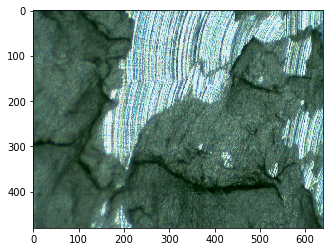

In [4]:
# load an image and explore
example_image = io.imread(diretorio+teste)

# show image
plt.imshow(example_image)

# print shape
print('Example image has shape: ', example_image.shape)
                    
# print color channel values for top left pixel
print('RGB values for the top left pixel are:', example_image[0, 0, :])

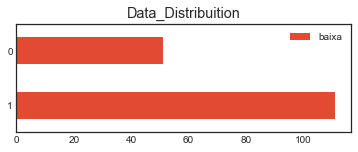

Data_Distribuition:
1    111
0     51
Name: baixa, dtype: int64


In [118]:
# load labels.csv from datasets folder using pandas
labels = pd.read_csv(r'C:\Users\rodri\CondaProjects\usinagem\fotos\adesao2.csv', index_col=0)

# print value counts for genus
pd.value_counts(labels['baixa']).plot.barh(legend=True, figsize=(6,2), title="Data_Distribuition")
plt.show()

# assign the label values to y
y = labels['baixa'].values

print('Data_Distribuition:')
print(pd.value_counts(labels['baixa']))

In [67]:
# initialize standard scaler
ss = StandardScaler()

image_list = []
for i in labels.index:
    # load image
    img = io.imread(r'C:\Users\rodri\CondaProjects\usinagem\fotos\{}'.format(i)).astype(np.float64)
    
    img = cv2.resize(img, (100, 100)) 
    
    # for each channel, apply standard scaler's fit_transform method
    for channel in range(img.shape[2]):
        img[:, :, channel] = ss.fit_transform(img[:, :, channel])
        
    # append to list of all images
    image_list.append(img)
    
# convert image list to single array
X = np.array(image_list)

# print shape of X
print(X.shape)

(162, 100, 100, 3)


In [97]:
# split out evaluation sets (x_eval and y_eval)
x_train, x_test, y_train, y_test = train_test_split(X,y,
                                           test_size= 0.19,
                                           random_state=42)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

131 train samples
31 test samples


In [98]:
# set model constants
num_classes = 1

# define model as Sequential
model = Sequential()

# first convolutional layer with 32 filters
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(100, 100, 3)))

# add a second 2D convolutional layer with 64 filters
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(100, 100, 3)))

# reduce dimensionality through max pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# third convolutional layer with 64 filters ##128
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
# add dropout to prevent over fitting
model.add(Dropout(0.25))
# necessary flatten step preceeding dense layer
model.add(Flatten())
# fully connected layer
model.add(Dense(128, activation='relu'))

# add additional dropout to prevent overfitting
model.add(Dropout(0.5))

# prediction layers
model.add(Dense(num_classes, activation='sigmoid', name='preds'))

# show model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 98, 98, 32)        896       
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 96, 96, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 46, 46, 128)       73856     
_________________________________________________________________
dropout_19 (Dropout)         (None, 46, 46, 128)       0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 270848)            0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               34668672  
__________

In [101]:
from keras.callbacks import ModelCheckpoint
# fix random seed for reproducibility
np.random.seed(seed)

In [102]:
model.compile(
    # set the loss as binary_crossentropy
    loss=keras.losses.binary_crossentropy,
    # set the optimizer as stochastic gradient descent
    optimizer=keras.optimizers.SGD(lr=0.001),
    # set the metric as accuracy
    metrics=['accuracy']
)


#es = keras.callbacks.EarlyStopping(monitor='loss', min_delta=0.0001, patience=3, verbose=0, mode='auto')

n_epochs = 100

# checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

# mock-train the model using the first ten observations of the train and test sets
H = model.fit(
    x_train,
    y_train,
    epochs=n_epochs,
    verbose=0,
    validation_data=(x_test, y_test),
    callbacks=callbacks_list
)


Epoch 00001: val_acc improved from -inf to 0.67742, saving model to weights.best.hdf5

Epoch 00002: val_acc did not improve from 0.67742

Epoch 00003: val_acc did not improve from 0.67742

Epoch 00004: val_acc did not improve from 0.67742

Epoch 00005: val_acc did not improve from 0.67742

Epoch 00006: val_acc did not improve from 0.67742

Epoch 00007: val_acc did not improve from 0.67742

Epoch 00008: val_acc did not improve from 0.67742

Epoch 00009: val_acc did not improve from 0.67742

Epoch 00010: val_acc did not improve from 0.67742

Epoch 00011: val_acc did not improve from 0.67742

Epoch 00012: val_acc improved from 0.67742 to 0.77419, saving model to weights.best.hdf5

Epoch 00013: val_acc did not improve from 0.77419

Epoch 00014: val_acc did not improve from 0.77419

Epoch 00015: val_acc did not improve from 0.77419

Epoch 00016: val_acc did not improve from 0.77419

Epoch 00017: val_acc did not improve from 0.77419

Epoch 00018: val_acc did not improve from 0.77419

Epoch 

In [103]:
score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

print("")

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train loss: 0.0817608396516
Train accuracy: 0.984732824427

Test loss: 0.394265264273
Test accuracy: 0.806451618671


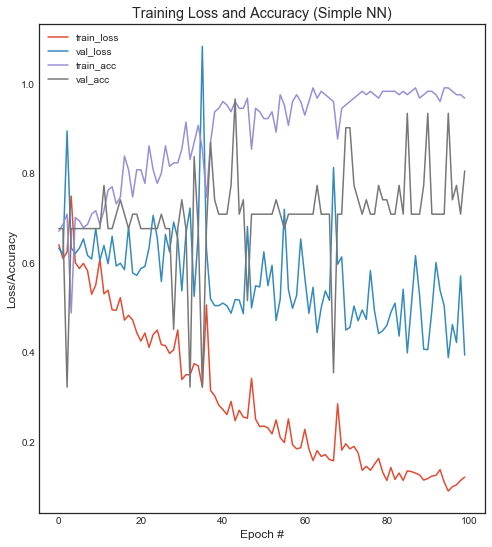

In [105]:
# plot the training loss and accuracy
import seaborn as sns
N = np.arange(0, 100)
plt.style.use("seaborn-white")
plt.figure(figsize=(8,9))
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["acc"], label="train_acc")
plt.plot(N, H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

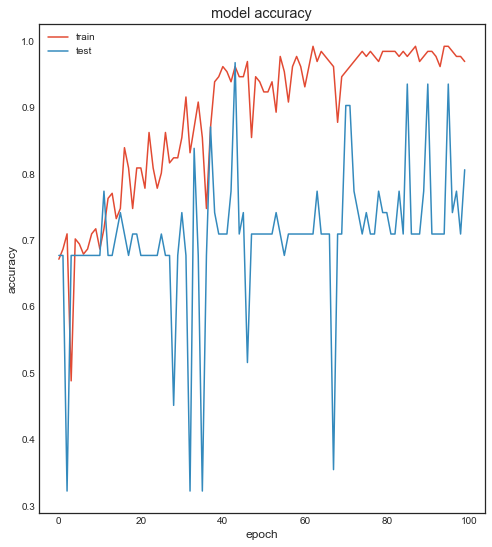

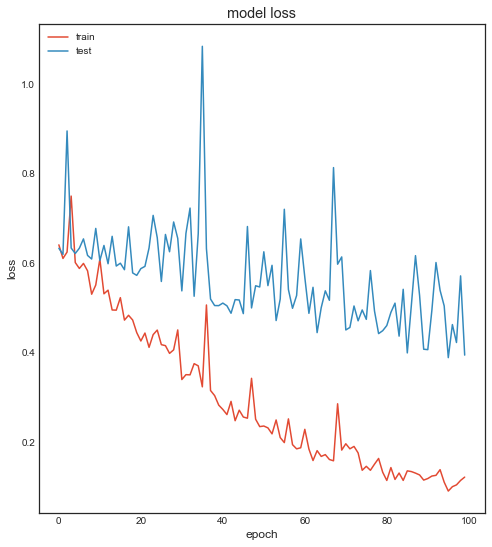

In [106]:
plt.figure(figsize=(8,9))
# summarize history for accuracy
plt.plot(N, H.history["acc"], label="train_acc")
plt.plot(N, H.history["val_acc"], label="val_acc")
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.figure(figsize=(8,9))
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [131]:
model.load_weights("weights.best.hdf5")
score = model.evaluate(x_train, y_train, verbose=0)
print('Train loss:', score[0])
print('Train accuracy:', score[1])

print("")

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train loss: 0.293937696528
Train accuracy: 0.96946564931

Test loss: 0.518459916115
Test accuracy: 0.967741906643


In [110]:
# save the model and label binarizer to disk
print("[INFO] serializing network and label binarizer...")
model.save("model")

[INFO] serializing network and label binarizer...


In [132]:
pred_train = model.predict(x_train)
pred_test = model.predict(x_test)

In [145]:
pred_test_val=[]
for val in pred_test:
    if val >=0.5:
        pred_test_val.append(1)
    else:
        pred_test_val.append(0)

pred_train_val=[]
for val in pred_train:
    if val >=0.5:
        pred_train_val.append(1)
    else:
        pred_train_val.append(0)

In [250]:
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_train, pred_train_val)
cm_test = confusion_matrix(y_test, pred_test_val)

cm_train_normal = cm_train.astype('float') / cm_train.sum(axis=1)[:, np.newaxis]
cm_test_normal = cm_test.astype('float') / cm_test.sum(axis=1)[:, np.newaxis]

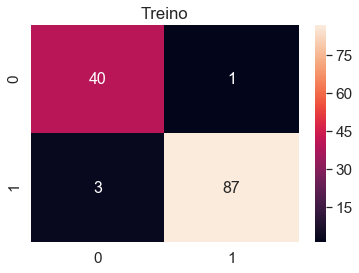

In [151]:
plt.figure(figsize = (6,4))
sns.set(font_scale=1.4)#for label size
sns.heatmap(cm_train, annot=True,annot_kws={"size": 16})# font size
plt.title("Treino")
plt.show()

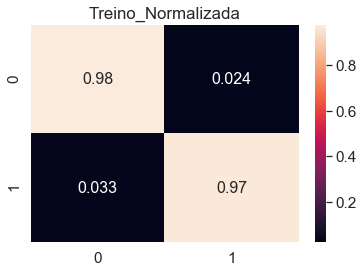

In [251]:
plt.figure(figsize = (6,4))
sns.set(font_scale=1.4)#for label size
sns.heatmap(cm_train_normal, annot=True,annot_kws={"size": 16})# font size
plt.title("Treino_Normalizada")
plt.show()

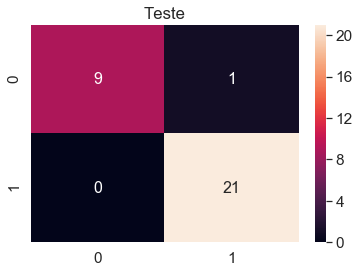

In [152]:
plt.figure(figsize = (6,4))
sns.set(font_scale=1.4)#for label size
sns.heatmap(cm_test, annot=True,annot_kws={"size": 16})# font size
plt.title("Teste")
plt.show()

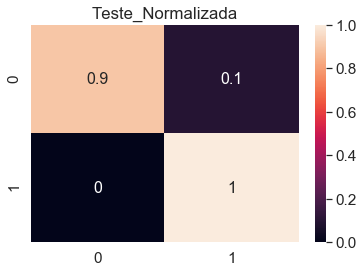

In [252]:
plt.figure(figsize = (6,4))
sns.set(font_scale=1.4)#for label size
sns.heatmap(cm_test_normal, annot=True,annot_kws={"size": 16})# font size
plt.title("Teste_Normalizada")
plt.show()

In [171]:
#Investigando a errada:
investigation = pred_test_val - y_test
print(investigation)
maximum = np.max(investigation)
index_of_maximum = np.where(investigation == maximum)
print("The mistake is at position:", index_of_maximum[0]) 

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
The mistake is at position: [9]


In [172]:
print("Threshold encontrado pela rede:")
pred_test[9]

Threshold encontrado pela rede:


array([ 0.8], dtype=float32)

In [173]:
print('Valor real')
y_test[9]

Valor real


0

In [211]:
# re-loading images without standardization

newimg_list = []
for i in labels.index:
    # load image
    newimg = io.imread(r'C:\Users\rodri\CondaProjects\usinagem\fotos\{}'.format(i))
            
    # append to list of all images
    newimg_list.append(newimg)
    
# convert image list to single array
reload = np.array(newimg_list)

# print shape of X
print(reload.shape)


# re - spliting out evaluation sets 
re_x_train, re_x_test, re_y_train, re_y_test = train_test_split(reload,y,
                                           test_size= 0.19,
                                           random_state=42)

(162,)


In [212]:
predicao_errada = re_x_test[9]

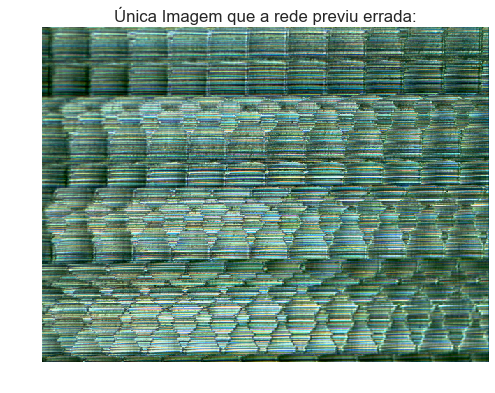

In [249]:
plt.figure(figsize=(8,10))
plt.axis('off')
plt.imshow(predicao_errada, interpolation='nearest')
plt.title("Única Imagem que a rede previu errada:")
plt.show()

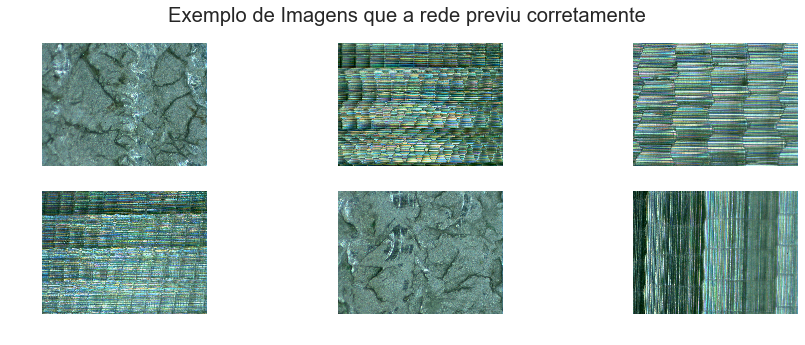

In [247]:
#plt.title("Exemplo de Imagem que a rede previu certa:")
f, axarr = plt.subplots(2,3, figsize=(15,5))
axarr[0,0].imshow(re_x_test[2], interpolation='nearest')
axarr[0,1].imshow(re_x_test[9], interpolation='nearest')
axarr[1,0].imshow(re_x_test[13], interpolation='nearest')
axarr[1,1].imshow(re_x_test[17], interpolation='nearest')
axarr[1,2].imshow(re_x_test[1], interpolation='nearest')
axarr[0,2].imshow(re_x_test[19], interpolation='nearest')
axarr[0,0].axis('off')
axarr[0,1].axis('off')
axarr[1,0].axis('off')
axarr[1,1].axis('off')
axarr[1,2].axis('off')
axarr[0,2].axis('off')
plt.suptitle('Exemplo de Imagens que a rede previu corretamente')
plt.show()